In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

170498071/170498071 [==============================] - 3s 0us/step


<ipython-input-2-91caaf7a9dc8>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


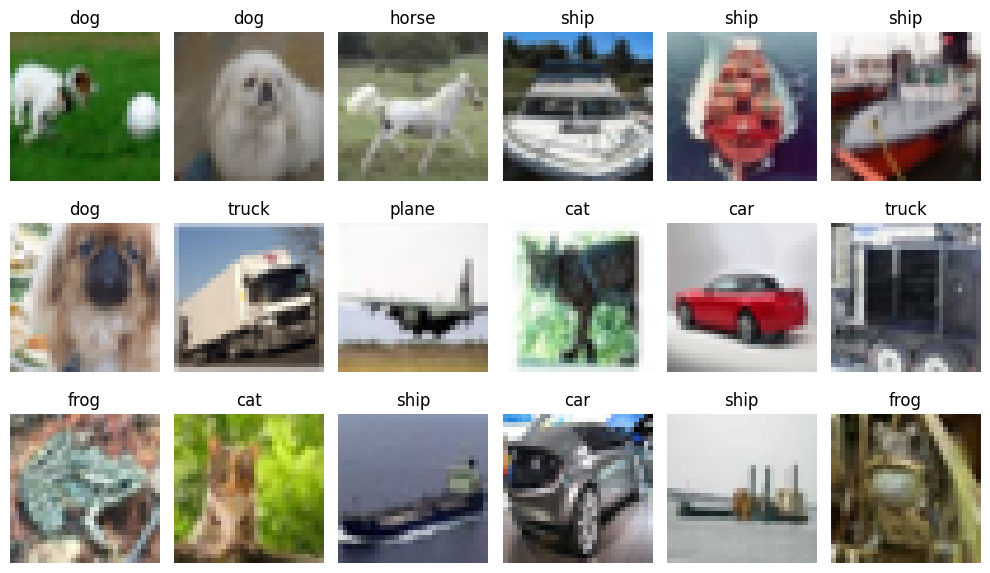

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
plt.figure(figsize=(10, 6))
for ii in range(18):
    plt.subplot(3, 6, ii+1)
    # Pick a random sample index
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx])
    plt.title(classes[int(y_train[idx])])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Count occurrences of each class label in the training set
class_histogram = np.zeros(num_classes, dtype=int)
for label in y_train:
    class_histogram[label[0]] += 1

# Print the class histogram
for i in range(num_classes):
    print(f"Class {i} ({classes[i]}): {class_histogram[i]} samples")


Class 0 (plane): 5000 samples
Class 1 (car): 5000 samples
Class 2 (bird): 5000 samples
Class 3 (cat): 5000 samples
Class 4 (deer): 5000 samples
Class 5 (dog): 5000 samples
Class 6 (frog): 5000 samples
Class 7 (horse): 5000 samples
Class 8 (ship): 5000 samples
Class 9 (truck): 5000 samples


In [4]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)


Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the classifier
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=15, batch_size=82, validation_data=(x_test, y_test))


Epoch 1/15
610/610 [==============================] - 37s 59ms/step - loss: 1.6741 - accuracy: 0.3836 - val_loss: 1.4417 - val_accuracy: 0.4695
Epoch 2/15
610/610 [==============================] - 33s 55ms/step - loss: 1.3509 - accuracy: 0.5148 - val_loss: 1.3245 - val_accuracy: 0.5189
Epoch 3/15
610/610 [==============================] - 32s 53ms/step - loss: 1.2432 - accuracy: 0.5574 - val_loss: 1.2133 - val_accuracy: 0.5677
Epoch 4/15
610/610 [==============================] - 33s 55ms/step - loss: 1.1626 - accuracy: 0.5874 - val_loss: 1.1790 - val_accuracy: 0.5784
Epoch 5/15
610/610 [==============================] - 32s 53ms/step - loss: 1.1066 - accuracy: 0.6087 - val_loss: 1.1137 - val_accuracy: 0.6084
Epoch 6/15
610/610 [==============================] - 37s 60ms/step - loss: 1.0653 - accuracy: 0.6244 - val_loss: 1.0733 - val_accuracy: 0.6213
Epoch 7/15
610/610 [==============================] - 33s 54ms/step - loss: 1.0269 - accuracy: 0.6404 - val_loss: 1.0894 - val_accuracy:

Train Acc:      0.7110400199890137
Validation Acc: 0.6682999730110168


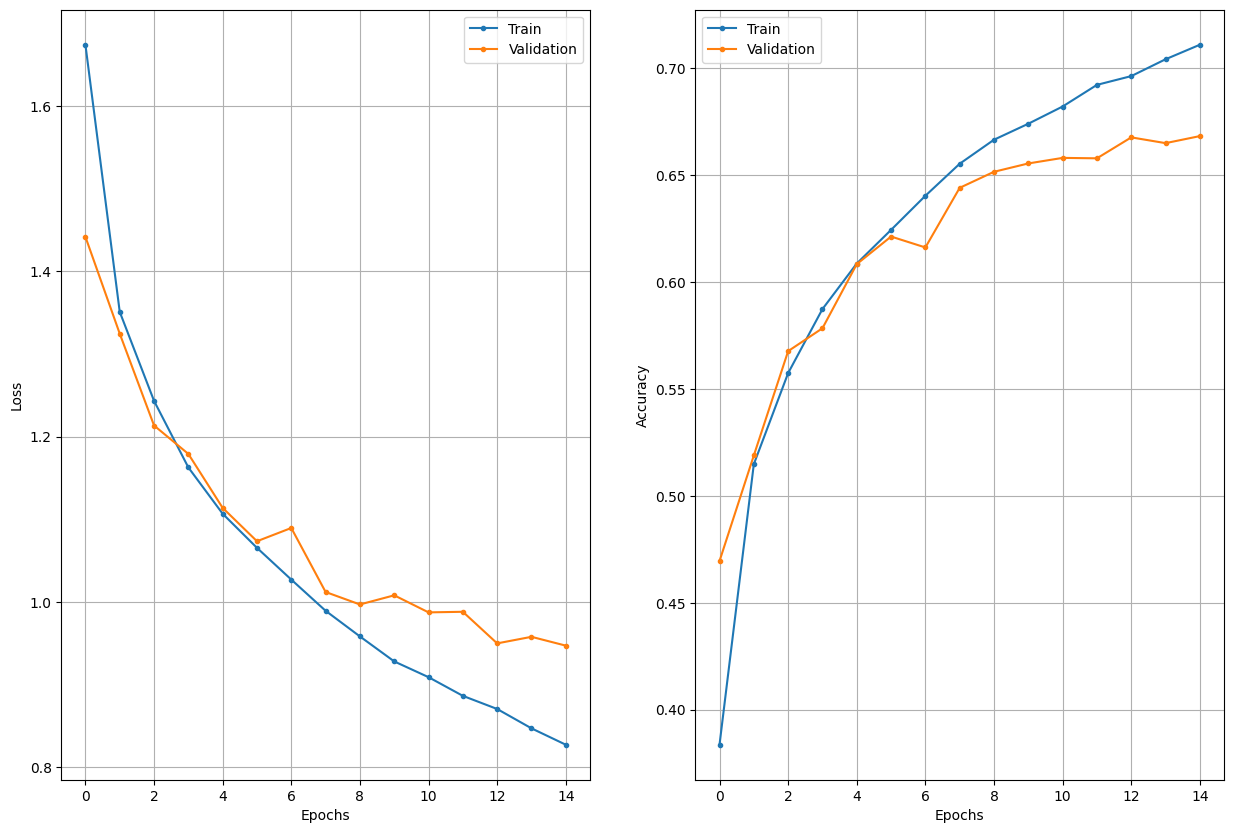

In [8]:
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121)
plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.subplot(122)
plt.plot(epochs, h['accuracy'], '.-', epochs, h['val_accuracy'], '.-')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc:     ', h['accuracy'][-1])
print('Validation Acc:', h['val_accuracy'][-1])

plt.show()


In [11]:
# Predict labels for the test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert true labels to sparse values
y_true = np.argmax(y_test, axis=1)


313/313 [==============================] - 2s 8ms/step


In [12]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    # Filter true and predicted labels for the current class
    true_class_indices = np.where(y_true == class_id)[0]
    pred_class_indices = np.where(y_pred == class_id)[0]

    # Compute the intersection to find correct predictions
    correct_predictions = len(np.intersect1d(true_class_indices, pred_class_indices))
    total_samples = len(true_class_indices)

    # Compute accuracy
    acc = correct_predictions / total_samples if total_samples != 0 else 0

    # Print class name and accuracy
    print(f"{class_name}: {acc}")


plane: 0.692
car: 0.75
bird: 0.614
cat: 0.557
deer: 0.428
dog: 0.555
frog: 0.719
horse: 0.717
ship: 0.844
truck: 0.807


In [13]:
# Evaluate the model on the test set
ev = model.evaluate(x_test, y_test)

# Print the overall stats
print('Test loss:   ', ev[0])
print('Test accuracy:', ev[1])


313/313 [==============================] - 2s 8ms/step - loss: 0.9470 - accuracy: 0.6683
Test loss:    0.9469999074935913
Test accuracy: 0.6682999730110168


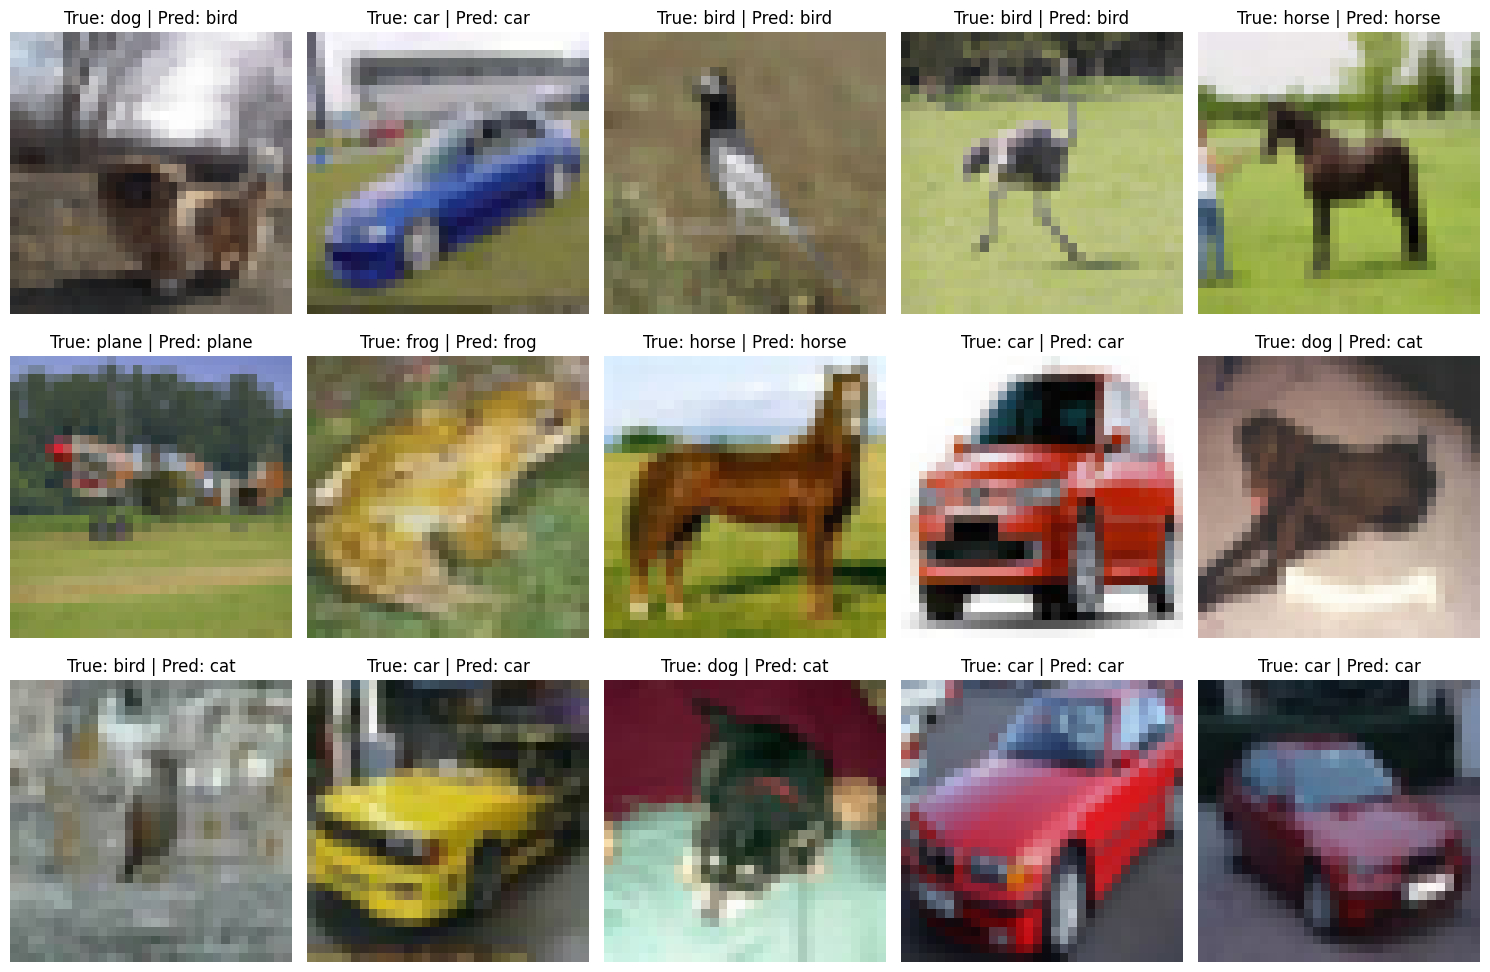

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Show random samples
plt.figure(figsize=(15, 10))
for ii in range(15):
    # Pick a random sample index
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3, 5, ii+1)
    plt.imshow(x_test[idx])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))
    plt.axis('off')

plt.tight_layout()
plt.show()


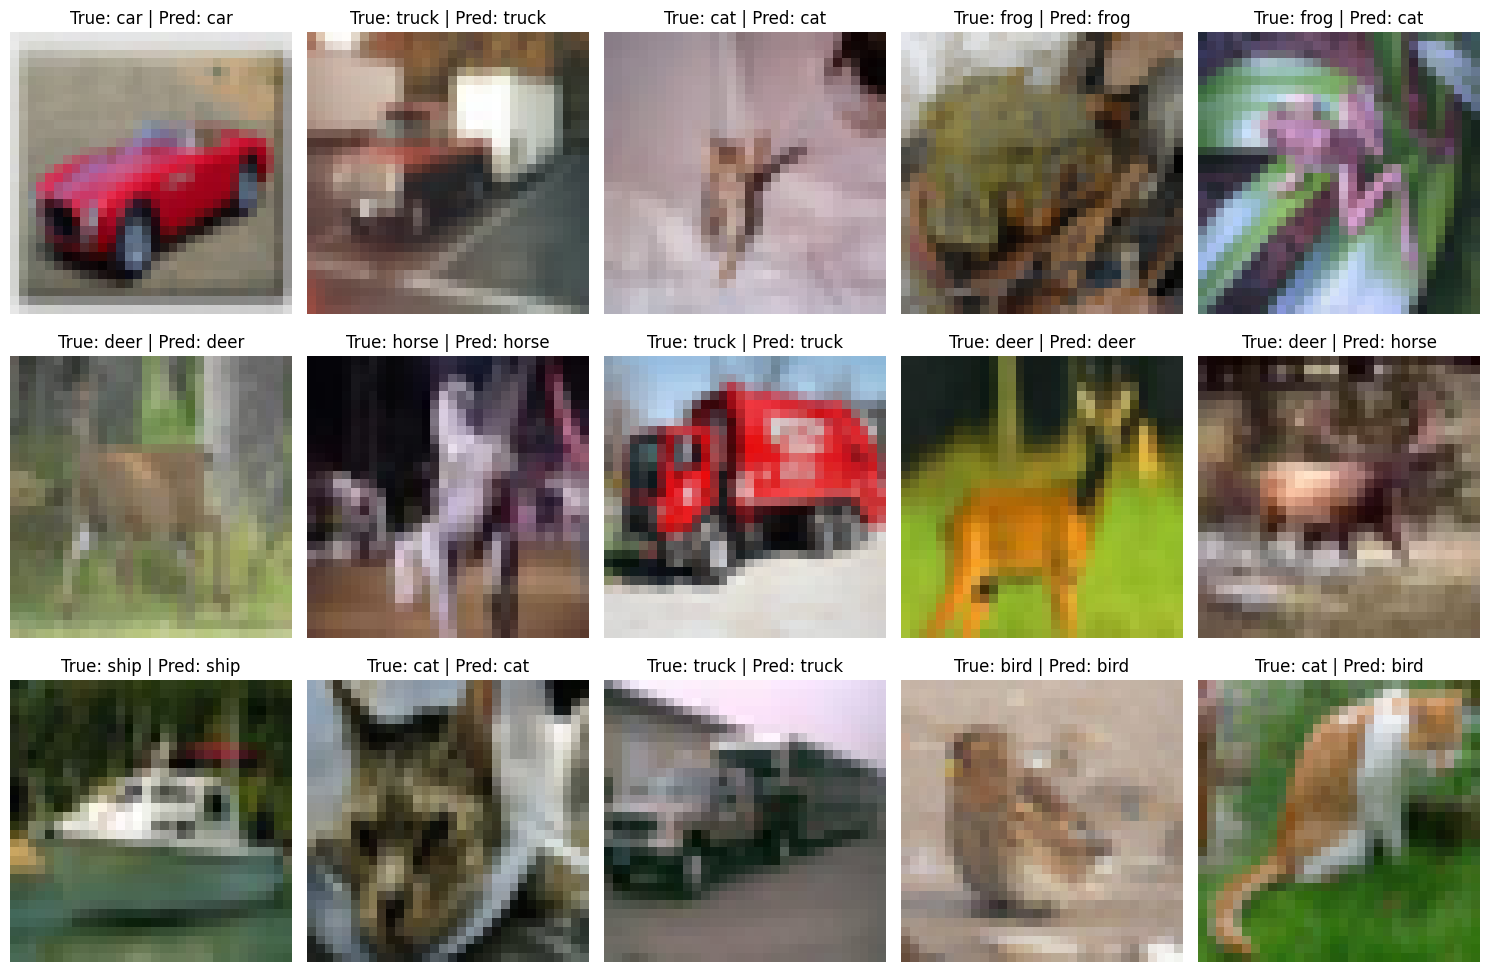

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Show random samples
plt.figure(figsize=(15, 10))
for ii in range(15):
    # Pick a random sample index
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3, 5, ii+1)
    plt.imshow(x_test[idx])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))
    plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
import numpy as np

# Extract accuracy values from the training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Calculate average accuracy over all epochs
average_train_acc = np.mean(train_acc)
average_val_acc = np.mean(val_acc)

print('Average Training Accuracy:', average_train_acc)
print('Average Validation Accuracy:', average_val_acc)


Average Training Accuracy: 0.6265840033690134
Average Validation Accuracy: 0.6165733297665914
